In [32]:
%load_ext autoreload
%autoreload 2

from text3d2video.pipelines.base_pipeline import BaseStableDiffusionPipeline
import torch
from diffusers import DPMSolverMultistepScheduler

sd_repo = "runwayml/stable-diffusion-v1-5"
dtype = torch.float16
pipe = BaseStableDiffusionPipeline.from_pretrained(sd_repo, dtype=dtype).to("cuda")
pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)

torch.set_grad_enabled(False)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Keyword arguments {'dtype': torch.float16} are not expected by BaseStableDiffusionPipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

/home/jorge/miniconda3/envs/thesis4/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


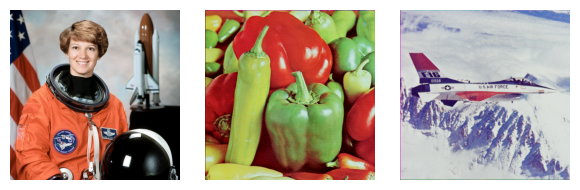

In [60]:
from torchvision.io import read_image
import torchvision.transforms.functional as TF

from text3d2video.utilities.ipython_utils import display_ims

image_paths = [
    "data/images/collins.png",
    "data/images/peppers.png",
    "data/images/airplane.png",
]

images = [read_image(image_path) for image_path in image_paths]
images = [TF.to_pil_image(image) for image in images]

display_ims(images)

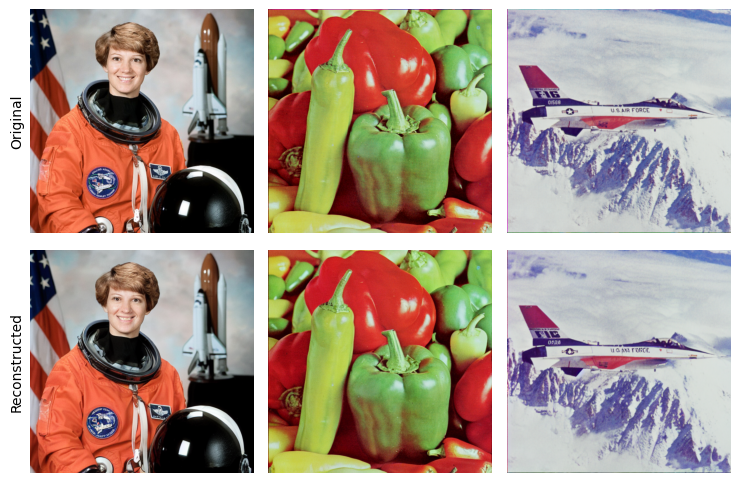

In [61]:
from text3d2video.utilities.ipython_utils import display_ims_grid

encoded = pipe.encode_images(images)
reconstructions = pipe.decode_latents(encoded)

display_ims_grid([images, reconstructions], row_titles=["Original", "Reconstructed"])